In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

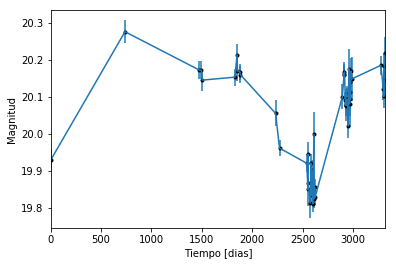

In [3]:
data = np.genfromtxt('LC_19055_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

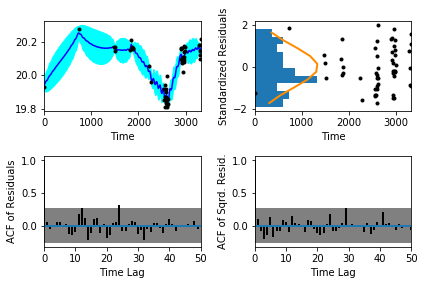

In [6]:
sample.assess_fit()

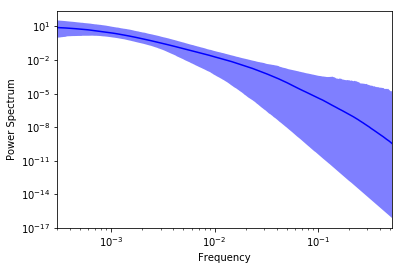

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0897328,'Medida del nivel de ruido')

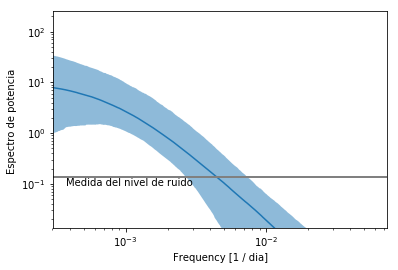

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

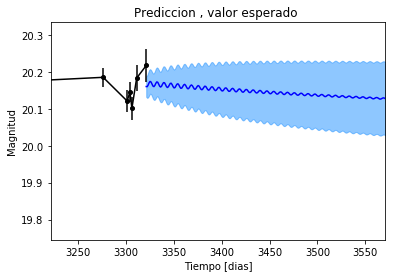

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

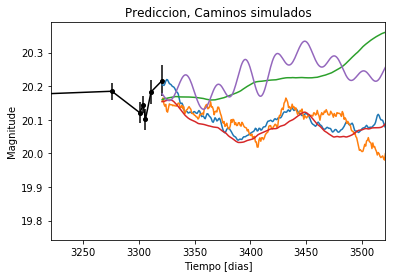

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


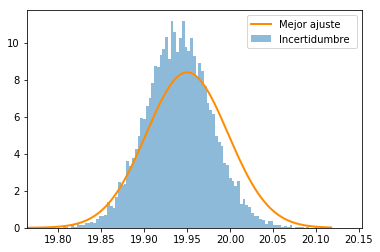

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

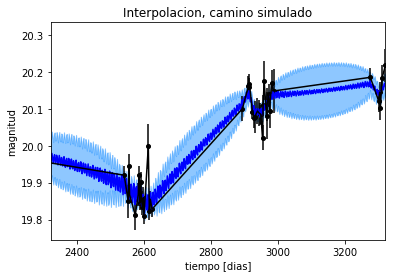

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

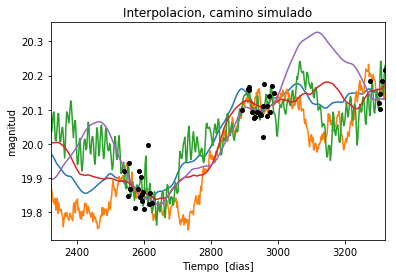

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 352.297221829
Median: 0.027848837448
Standard deviation: 0.21395127317
68% credibility interval: [ 0.00171733  0.26510543]
95% credibility interval: [  3.91655287e-04   8.21954544e-01]
99% credibility interval: [  3.19610594e-04   9.90829438e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 502.49211349
Median: 0.00577311520558
Standard deviation: 0.100479792639
68% credibility interval: [ 0.0005674   0.06649254]
95% credibility interval: [  3.31385126e-04   3.51186566e-01]
99% credibility interval: [  3.05703741e-04   6.79424410e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 881.642521591
Median: 0.0333868094583
Sta

In [17]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 532.416245577
Median: 0.0386976751378
Standard deviation: 0.271309649081
68% credibility interval: [ 0.          0.47152686]
95% credibility interval: [ 0.          0.93856486]
99% credibility interval: [ 0.          1.01694716]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 532.416245577
Median: 0.0386976751378
Standard deviation: 0.271309649081
68% credibility interval: [ 0.          0.47152686]
95% credibility interval: [ 0.          0.93856486]
99% credibility interval: [ 0.          1.01694716]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2147.28702863
Median: 0.0
Standard deviation: 0.000418951884674
68% cr

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 492.335890266
Median: 106.949691131
Standard deviation: 1.80938338607
68% credibility interval: [ 104.94950139  108.41577329]
95% credibility interval: [ 102.45355228  109.26770069]
99% credibility interval: [ 100.5957286  109.9297552]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 319.022313421
Median: 1.00188491102
Standard deviation: 2.37680113784
68% credibility interval: [ 0.11372624  4.48627236]
95% credibility interval: [ 0.02556835  8.2008779 ]
99% credibility interval: [  0.01336736  10.87852365]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 664.921887955
Median: 1.41812360583
Standard deviation: 10.3818973757
68% credibility interval: [  0.06257181  13.05705544]
95% credibility interval: [  3.95934877e

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 8679.43807435
Median: 1.41061820125e-30
Standard deviation: 1.85357453123e+64
68% credibility interval: [  5.52514058e-67   2.56603041e-02]
95% credibility interval: [  2.45799860e-96   1.33882624e+37]
99% credibility interval: [  1.21717294e-105   2.68709253e+055]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2477.64746633
Median: 20.0893699677
Standard deviation: 0.0651435532988
68% credibility interval: [ 20.03690431  20.14891534]
95% credibility interval: [ 19.96430206  20.22917415]
99% credibility interval: [ 19.89923075  20.30210621]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 532.416245577
Median: 0.0386976751378
Standard deviation: 0.271309649081
68% credibility interval: [ 0.          0.47152686]
95% credibility interval: [ 0.          0.93856486]
99% credibility interval: [ 0.          1.01694716]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 532.416245577
Median: 0.0386976751378
Standard deviation: 0.271309649081
68% credibility interval: [ 0.          0.47152686]
95% credibility interval: [ 0.          0.93856486]
99% credibility interval: [ 0.          1.01694716]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2147.28702863
Median: 0.0
Standard deviation: 0.000418951884674
68% cr

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 492.335890266
Median: 106.949691131
Standard deviation: 1.80938338607
68% credibility interval: [ 104.94950139  108.41577329]
95% credibility interval: [ 102.45355228  109.26770069]
99% credibility interval: [ 100.5957286  109.9297552]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 978.01920606
Median: 0.0188166956487
Standard deviation: 0.0187695166392
68% credibility interval: [ 0.01169277  0.03303058]
95% credibility interval: [ 0.00777522  0.06263182]
99% credibility interval: [ 0.00636311  0.12298223]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2758.77606397
Median: 1.13426858428
Standard deviation: 0.195257736022
68% credibility interval: [ 0.96800334  1.34546331]
95% credibility interval: [ 0.82188159  1.59086156]
99% credibility interval: [ 0.73344216  1.77415086]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 522.053557683
Median: 0.000847179150043
Standard deviation: 0.153446247041
68% credibility interval: [  3.95652959e-06   2.17196935e-02]
95% credibility interval: [  7.28828984e-39   2.59032995e-01]
99% credibility interval: [  1.29200330e-58   1.13306259e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 352.297221829
Median: (-0.174979406275-1.83465381085j)
Standard deviation: 2.17096621076
68% credibility interval: [-1.66570653+0.j -0.01079029+0.j]
95% credibility interval: [ -5.16449272e+00+0.j          -2.46084275e-03-0.00444605j]
99% credibility interval: [ -6.22556497e+00+0.j          -2.00817259e-03-0.89670928j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 502.49211349
Median: (-0.0362735526364+0.106132949655j)
Standard deviation: 1.81784087929
68% credibility interval: [-0.41778492+2.83783918j -0.00356511+0.24892573j]
95% credibility interval: [ -2.20657027e+00+3.30100196j  -2.08215415e-03+0.00464607j]
99% credibility interval: [ -4.26894947e+00+2.23767057j  -1.92079326e-03+0.j        ]
Posterior summary for